In [2]:
%matplotlib inline

In [55]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import kstest

# Ejercicio

* Cargar dataset

In [4]:
df = pd.read_csv('../../../data/housing_price.csv')

* imprimir en pantalla cuantas filas y columnas hay en el dataset

In [5]:
df.shape
print("EL df tiene {0} filas y {1} columnas".format(df.shape[0], df.shape[1]))

EL df tiene 1460 filas y 81 columnas


* cambiar nombre variables a minúscula

In [6]:
df.rename(str.lower, axis='columns', inplace=True)

df = df.rename(columns=lambda name: name.lower())


* estudiar formato de las variables

In [7]:
df.info()

df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

id                 int64
mssubclass         int64
mszoning          object
lotfrontage      float64
lotarea            int64
street            object
alley             object
lotshape          object
landcontour       object
utilities         object
lotconfig         object
landslope         object
neighborhood      object
condition1        object
condition2        object
bldgtype          object
housestyle        object
overallqual        int64
overallcond        int64
yearbuilt          int64
yearremodadd       int64
roofstyle         object
roofmatl          object
exterior1st       object
exterior2nd       object
masvnrtype        object
masvnrarea       float64
exterqual         object
extercond         object
foundation        object
                  ...   
bedroomabvgr       int64
kitchenabvgr       int64
kitchenqual       object
totrmsabvgrd       int64
functional        object
fireplaces         int64
fireplacequ       object
garagetype        object
garageyrblt      float64


* modificar formato de las variables al adecuado

In [8]:
df.yrsold=df.yrsold.astype(float)

* crear lista con variables con nulos y el porcentaje de nulos que tienen

In [9]:
nulls = (df.isnull().sum()/len(df)).sort_values(ascending=False)

In [10]:
nulls

poolqc           0.995205
miscfeature      0.963014
alley            0.937671
fence            0.807534
fireplacequ      0.472603
lotfrontage      0.177397
garagecond       0.055479
garagetype       0.055479
garageyrblt      0.055479
garagefinish     0.055479
garagequal       0.055479
bsmtexposure     0.026027
bsmtfintype2     0.026027
bsmtfintype1     0.025342
bsmtcond         0.025342
bsmtqual         0.025342
masvnrarea       0.005479
masvnrtype       0.005479
electrical       0.000685
utilities        0.000000
yearremodadd     0.000000
mssubclass       0.000000
foundation       0.000000
extercond        0.000000
exterqual        0.000000
exterior2nd      0.000000
exterior1st      0.000000
roofmatl         0.000000
roofstyle        0.000000
yearbuilt        0.000000
                   ...   
garagearea       0.000000
paveddrive       0.000000
wooddecksf       0.000000
openporchsf      0.000000
3ssnporch        0.000000
bsmtunfsf        0.000000
screenporch      0.000000
poolarea    

In [12]:
nulls=(df.isnull().sum()/len(df)).sort_values(ascending=False)
list_of_nulls= ([element for element in 
                 zip(nulls.index,nulls.values.tolist())])
list_of_nulls

[('poolqc', 0.9952054794520548),
 ('miscfeature', 0.963013698630137),
 ('alley', 0.9376712328767123),
 ('fence', 0.8075342465753425),
 ('fireplacequ', 0.4726027397260274),
 ('lotfrontage', 0.1773972602739726),
 ('garagecond', 0.05547945205479452),
 ('garagetype', 0.05547945205479452),
 ('garageyrblt', 0.05547945205479452),
 ('garagefinish', 0.05547945205479452),
 ('garagequal', 0.05547945205479452),
 ('bsmtexposure', 0.026027397260273973),
 ('bsmtfintype2', 0.026027397260273973),
 ('bsmtfintype1', 0.025342465753424658),
 ('bsmtcond', 0.025342465753424658),
 ('bsmtqual', 0.025342465753424658),
 ('masvnrarea', 0.005479452054794521),
 ('masvnrtype', 0.005479452054794521),
 ('electrical', 0.0006849315068493151),
 ('utilities', 0.0),
 ('yearremodadd', 0.0),
 ('mssubclass', 0.0),
 ('foundation', 0.0),
 ('extercond', 0.0),
 ('exterqual', 0.0),
 ('exterior2nd', 0.0),
 ('exterior1st', 0.0),
 ('roofmatl', 0.0),
 ('roofstyle', 0.0),
 ('yearbuilt', 0.0),
 ('lotconfig', 0.0),
 ('overallcond', 0.0),

* crear lista con variables numéricas

In [13]:
str(df.dtypes[0])

'int64'

In [14]:
tipos=df.dtypes
nums=(tipos.map(lambda tipo: 
        ('int' in str(tipo)) | ('float' in str(tipo))).tolist())

df_num = df.loc[:,nums]
df_num

lista_numericas = list(df_num)
lista_numericas

['id',
 'mssubclass',
 'lotfrontage',
 'lotarea',
 'overallqual',
 'overallcond',
 'yearbuilt',
 'yearremodadd',
 'masvnrarea',
 'bsmtfinsf1',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 '1stflrsf',
 '2ndflrsf',
 'lowqualfinsf',
 'grlivarea',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'totrmsabvgrd',
 'fireplaces',
 'garageyrblt',
 'garagecars',
 'garagearea',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 '3ssnporch',
 'screenporch',
 'poolarea',
 'miscval',
 'mosold',
 'yrsold',
 'saleprice']

## variables dummy

In [15]:
df.saletype.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: saletype, dtype: int64

In [16]:
columns_to_dummy = ['saletype']

for column in columns_to_dummy:
    df[column] = (df[column].map(lambda name: name.lower()
                                 .replace('.','_')
                                 .replace('-', '_')
                                 .strip()
                                 .replace(' ','_')
                                ))
    df = pd.get_dummies(df, prefix=column, columns=[column])

## pasar de categóricas ordinales a numéricas

In [19]:
df.lotshape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: lotshape, dtype: int64

Reg --> 0
IR1 --> 1
IR2 --> 2
IR3 --> 3

In [ ]:
def cambio_ifs(valor):
    if valor == 'Reg':
        cambio = 0
    elif valor == 'IR1':
        cambio =1
    elif valor == 'IR2':
        cambio = 2
    elif valor == 'IR3':
        cambio = 3
    else: cambio = np.nan
    return cambio

In [20]:
def cambio_dict(valor):
    dictionary = {'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3}
    
    if valor in dictionary.keys():
        cambio = dictionary[valor]
    else: cambio = np.nan
        
    return cambio

In [21]:
df['lotshape_num'] = df.lotshape.map(cambio_dict)

In [28]:
df[['lotshape', 'lotshape_num']].nunique()

lotshape        4
lotshape_num    4
dtype: int64

In [29]:
df.groupby(['lotshape', 'lotshape_num']).count()

,,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,landcontour,utilities,lotconfig,...,saleprice,saletype_cod,saletype_con,saletype_conld,saletype_conli,saletype_conlw,saletype_cwd,saletype_new,saletype_oth,saletype_wd
lotshape,lotshape_num,,,,,,,,,,,,,,,,,,,,,
IR1,1,484,484,484,317,484,484,11,484,484,484,...,484,484,484,484,484,484,484,484,484,484
IR2,2,41,41,41,26,41,41,2,41,41,41,...,41,41,41,41,41,41,41,41,41,41
IR3,3,10,10,10,7,10,10,1,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Reg,0,925,925,925,851,925,925,77,925,925,925,...,925,925,925,925,925,925,925,925,925,925


## ESTUDIO OUTLIERS

In [37]:
columnas_numericas = ([(columna, str(tipo)) for columna, tipo in 
                       zip(df.dtypes.index, df.dtypes.values) if 'int' in str(tipo)
                       or 'float' in str(tipo)])

In [39]:
columnas_numericas_nombres = [element[0] for element in columnas_numericas]

In [41]:
df[columnas_numericas_nombres]

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,saletype_cod,saletype_con,saletype_conld,saletype_conli,saletype_conlw,saletype_cwd,saletype_new,saletype_oth,saletype_wd,lotshape_num
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,0,0,0,1,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,0,0,0,0,1,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,0,0,0,1,1
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,0,0,0,0,0,0,0,1,1
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,0,0,0,0,0,1,0
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,0,0,0,0,0,0,0,0,1,1
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,0,0,0,0,0,0,0,0,1,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,0,0,0,0,0,1,0


In [43]:
columnas_numericas_nombres

['id',
 'mssubclass',
 'lotfrontage',
 'lotarea',
 'overallqual',
 'overallcond',
 'yearbuilt',
 'yearremodadd',
 'masvnrarea',
 'bsmtfinsf1',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 '1stflrsf',
 '2ndflrsf',
 'lowqualfinsf',
 'grlivarea',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'totrmsabvgrd',
 'fireplaces',
 'garageyrblt',
 'garagecars',
 'garagearea',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 '3ssnporch',
 'screenporch',
 'poolarea',
 'miscval',
 'mosold',
 'yrsold',
 'saleprice',
 'saletype_cod',
 'saletype_con',
 'saletype_conld',
 'saletype_conli',
 'saletype_conlw',
 'saletype_cwd',
 'saletype_new',
 'saletype_oth',
 'saletype_wd',
 'lotshape_num']

### estudiar la distribución de las variables

## 1) mediante gráficas

/home/datio/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/datio/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


ValueError: cannot convert float NaN to integer

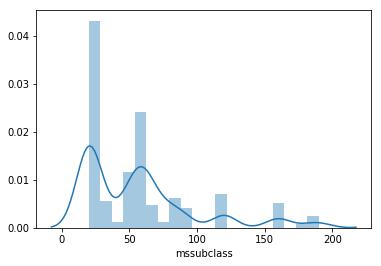

In [53]:
for element in columnas_outliers:
    sns.distplot(df[element])

## 2) mediante test de hipótesis: estudiar normalidad

la hiṕotesis nula del Test de Kolmogorov-Smirnov es que el conjunto de datos sí sigue la distribución indicada (distribució normal en este caso). Tras marcar un límite para el p-Value, si el pvalue que retorna el test es inferior al límite podemos DESECHAR la hipótesis nula y por lo tanto suponer que no sigue una distribución normal. En cambio, si el pvalue que retorne el test es mayor que el valor límite establecido, determinamos que SÍ sigue una distribución normal.

In [57]:
normal_distribution = []
pvalue_threshold = 0.05

for element in columnas_outliers:
    if kstest(df[element], 'norm')[-1] > pvalue_threshold:
        normal_distribution.append((element, kstest(df[element], 'norm')[-1]))

normal_distribution

/home/datio/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/datio/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/datio/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/home/datio/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


[]

### cómo eliminar outliers si distribución normal

In [ ]:
outliers_normal = []
num_desv_tip = 2

for element in normal_distribution:
    mean = df[element[0]].mean()
    std = df[element[0]].std()
    
    upper_limit = mean + num_desv_tip*std
    lower_limit = mean - num_desv_tip*std
    
    num_rows_before = len(df)
    
    num_rows_after = len(df[(df[element[0]]>=lower_limit) & (df[element[0] <= upper_limit])])
        
    (outliers_normal.append({'column':element[0], 'lower_limit':lower_limit, 
                            'upper_limit':upper_limit, 
                'num_outliers':(num_rows_before-num_rows_after)*100/num_rows_before}))

* estudiando los resultados de outliers_normal calibramos el valor de num_desv_tip

In [ ]:
#ahora hacemos el filtro de los outliers

for element in outliers_normal:
    df[element['column']] =(df[(df[element['column']]>= element['lower_limit']) & 
                                (df[element['column']]<= element['upper_limit'])])

## RIQ

In [ ]:
outilers_riq  = ([element in columnas_numericas_nombres if element not in 
                  [col[0] for col in outliers_normal]])

In [ ]:
valores_outliers_riq = []
riq_factor = 1.5

for element in outilers_riq:
    q1,q3 = df[element].quantile([0.25, 0.75])
    riq = q3-q1
    
    upper_limit = q3 + riq_factor*riq
    lower_limit = q1 - riq_factor*riq
    
    num_rows_before = len(df)
    
    num_rows_after = len(df[(df[element]>=lower_limit) & (df[element] <= upper_limit)])
    
    valores_outliers_riq.append({'column':element, 'lower_limit':lower_limit, 'upper_limit':upper_limit, 'num_outliers':num_rows_before-num_rows_after})

In [ ]:
#ahora hacemos el filtro de los outliers

for element in valores_outliers_riq:
    df[element['column']] =(df[(df[element['column']]>= element['lower_limit']) & 
                                (df[element['column']]<= element['upper_limit'])])